In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [15]:
eosdir_pos = '/eos/uscms/store/user/jennetd/smart-pixels/dataset678/unflipped-positive/'
eosdir_neg = '/eos/uscms/store/user/jennetd/smart-pixels/dataset678/unflipped-negative/'

df = pd.DataFrame()

print('Processing + charge')
for f in os.listdir(eosdir_pos):
    if 'recon' in f:
        continue
        
    thisdf = pd.read_csv(eosdir_pos+f)
    thatdf = pd.read_csv(eosdir_pos+'recon2D_'+f.split('_')[1])
    
    thisdf['size'] = thatdf.astype(bool).sum(axis=1)
    
    df = pd.concat([df,thisdf])
    
print('Processing - charge')
for f in os.listdir(eosdir_neg):
    if 'recon' in f:
        continue
        
    thisdf = pd.read_csv(eosdir_neg+f)
    thatdf = pd.read_csv(eosdir_neg+'recon2D_'+f.split('_')[1])
    
    thisdf['size'] = thatdf.astype(bool).sum(axis=1)
    
    df = pd.concat([df,thisdf])

Processing + charge
Processing - charge


In [16]:
df.head()

,x-entry,y-entry,z-entry,n_x,n_y,n_z,number_eh_pairs,y-local,pt,cotAlpha,cotBeta,y-midplane,x-midplane,size
0,187.960602,5.819384,100.0,-3.201757,-0.015797,-0.738721,37967.0,-0.963780,0.740845,4.334190,0.021384,4.750171,-28.748886,19
1,9.408124,13.200923,100.0,0.826235,0.026282,-1.371215,6538.0,0.884188,1.372050,-0.602557,-0.019167,14.159270,39.535967,6
2,84.732826,10.721191,100.0,-0.306291,0.083919,-0.791659,5891.0,4.285150,0.795417,0.386898,-0.106004,16.021390,65.387944,5
3,-256.300446,-5.275360,100.0,7.125055,0.304351,-1.834402,28788.0,5.466930,1.858530,-3.884130,-0.165913,3.020286,-62.093969,17
4,-46.793102,3.082501,100.0,-0.121722,-0.072646,-1.224502,7427.0,-1.060050,1.226800,0.099405,0.059327,0.116152,-51.763367,4


Text(0.5, 0, 'Cluster size')

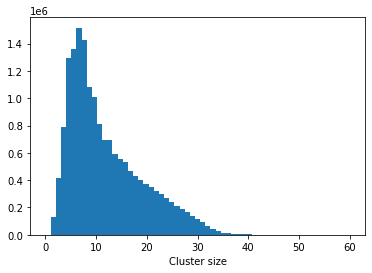

In [21]:
plt.hist(df['size'],bins=np.linspace(0,60,60));
plt.xlabel('Cluster size')

In [19]:
print(np.mean(df['size']),np.std(df['size']))

12.188466547920676 7.152196815880327


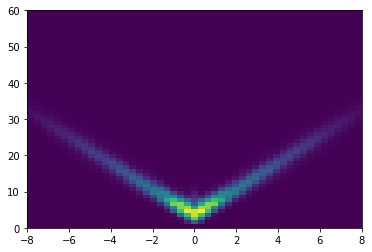

In [26]:
plt.hist2d(x=df['cotAlpha'],y=df['size'],bins=[np.linspace(-8,8,50),np.linspace(0,60,60)]);

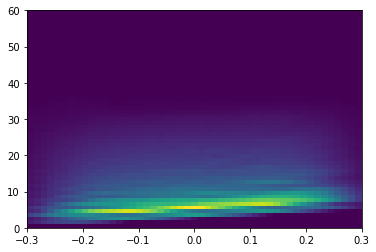

In [29]:
plt.hist2d(x=df['cotBeta'],y=df['size'],bins=[np.linspace(-0.3,0.3,50),np.linspace(0,60,60)]);

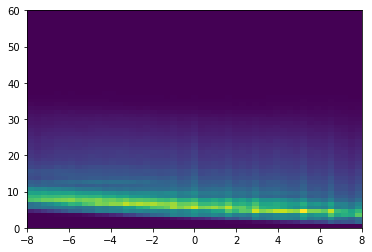

In [30]:
plt.hist2d(x=df['y-local'],y=df['size'],bins=[np.linspace(-8,8,50),np.linspace(0,60,60)]);

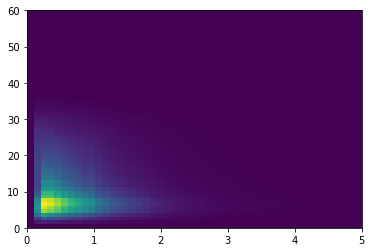

In [32]:
plt.hist2d(x=abs(df['pt']),y=df['size'],bins=[np.linspace(0,5,50),np.linspace(0,60,60)]);

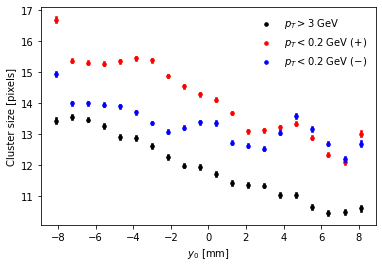

In [33]:
split = 0.2

fig, ax1 = plt.subplots()

sns.regplot(x=df['y-local'][abs(df['pt'])>3], y=df['size'][abs(df['pt'])>3], x_bins=np.linspace(-8.1,8.1,20), fit_reg=None, marker='.',ci=68,color='black',ax=ax1,label=r'$p_T>3$ GeV')
sns.regplot(x=df['y-local'][(abs(df['pt'])<split) & (df['pt']>0)], y=df['size'][(abs(df['pt'])<split) & (df['pt']>0)], x_bins=np.linspace(-8.1,8.1,20), fit_reg=None, marker='.',ci=68,color='red',ax=ax1,label=r'$p_T<0.2$ GeV (+)')
sns.regplot(x=df['y-local'][(abs(df['pt'])<split) & (df['pt']<0)], y=df['size'][(abs(df['pt'])<split) & (df['pt']<0)], x_bins=np.linspace(-8.1,8.1,20), fit_reg=None, marker='.',ci=68,color='blue',ax=ax1,label=r'$p_T<0.2$ GeV ($-$)')
ax1.set_ylabel('Cluster size [pixels]')
ax1.set_xlabel(r'$y_0$ [mm]')
#ax1.set_ylim(2,7.5)
plt.legend(frameon=False)

plt.savefig('dataset678/ylocal_size.pdf',bbox_inches='tight')
